In [39]:
# Primer ejercicio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
data = pd.DataFrame({
    "Representante": [
        "Alejandra Gómez", "Luis Maldonado", "Paola Gutierrez",
        "Rodrigo ordoñez", "Fernanda Ortiz", "Héctor Perez",
        "Valeria Sanchez", "Diego Rodrigo", "Mariana León", "Oscar Ríos"
    ],
    "llamadas": [16, 34, 22, 28, 18, 26, 32, 20, 40, 30],
    "ventas":   [32, 60, 45, 55, 36, 48, 66, 39, 80, 58]
})

data



,Representante,llamadas,ventas
0,Alejandra Gómez,16,32
1,Luis Maldonado,34,60
2,Paola Gutierrez,22,45
3,Rodrigo ordoñez,28,55
4,Fernanda Ortiz,18,36
5,Héctor Perez,26,48
6,Valeria Sanchez,32,66
7,Diego Rodrigo,20,39
8,Mariana León,40,80
9,Oscar Ríos,30,58


In [41]:
data.shape

(10, 3)

In [42]:
X_calls = data[['llamadas']].values
y_sales = data['ventas'].values

reg_model = LinearRegression()
reg_model.fit(X_calls, y_sales)


LinearRegression()

In [43]:
y_pred = reg_model.predict(X_calls)

print("Pendiente:", reg_model.coef_[0])
print("Intercepto:", reg_model.intercept_)
print("MSE:", mean_squared_error(y_sales, y_pred))
print("R2:", r2_score(y_sales, y_pred))


Pendiente: 1.4524328249818441
Intercepto: 11.074800290486579
MSE: 32.610748002904884
R2: 0.8769405735739438


In [44]:
llamadas_prueba = [[18]]
ventas_estimadas = reg_model.predict(llamadas_prueba)

print(
    "Para", llamadas_prueba[0][0],
    "llamadas, las ventas estimadas son:",
    round(ventas_estimadas[0], 2)
)

Para 18 llamadas, las ventas estimadas son: 37.22


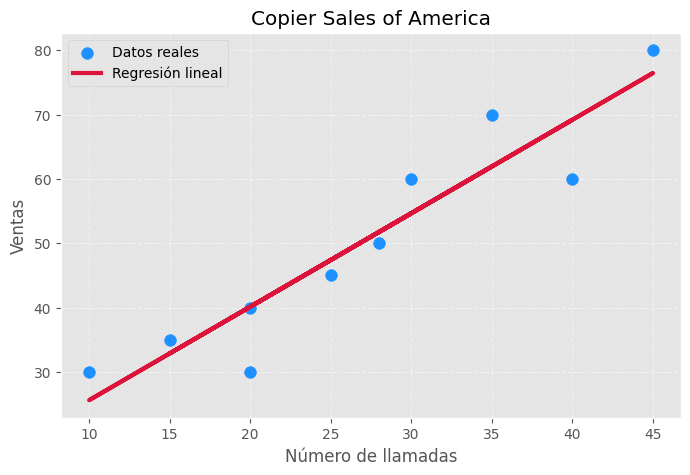

In [45]:
plt.figure(figsize=(8,5))

plt.scatter(
    X_calls.flatten(),
    y_sales,
    color='dodgerblue',
    s=70,
    label='Datos reales'
)

plt.plot(
    X_calls.flatten(),
    reg_model.predict(X_calls),
    color='crimson',
    linewidth=3,
    label='Regresión lineal'
)

plt.xlabel('Número de llamadas')
plt.ylabel('Ventas')
plt.title('Copier Sales of America')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
